## Basic Configuration and Setup

In [4]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
#warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('datasets/auto-mpg-processed.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,24.5,4,98.0,60,2164,22.1,47
1,35.0,4,72.0,69,1613,18.0,52
2,28.4,4,151.0,90,2670,16.0,44
3,19.0,6,225.0,100,3630,17.7,46
4,14.0,8,454.0,220,4354,9.0,53


In [7]:
FEATURES = list(df.columns[1:])
FEATURES

['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'age']

In [8]:
result_dict = {}

In [27]:
def build_model(regression_fn,
                name_of_y_col,
                name_of_x_cols,
                dataset,
                test_frac = 0.2,
                preprocess_fn=None,
                show_plot_Y=False,
                show_plot_scatter=False):
    
    X = df[name_of_x_cols]
    Y = df[name_of_y_col]

    if preprocess_fn is not None:
        X = preprocess_fn(X)

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)

    model = regression_fn(x_train, y_train)

    y_pred = model.predict(x_test)

    print("Training Score: ", model.score(x_train, y_train))
    print("Test Score: ", r2_score(y_test, y_pred))

    if show_plot_Y == True:
        fix, ax = plt.subplots(figsize = (12, 8))

        plt.plot(y_pred, label='Predicted')
        plt.plot(y_test.values, label='Actual')

        plt.ylabel(name_of_y_col)

        plt.legend()
        plt.show()

    if show_plot_scatter == True:
        fix, ax = plt.subplots(figsize = (12, 8))

        plt.scatter(x_test, y_test)
        plt.plot(x_test, y_pred, 'r')

        plt.legend(['Predicted Line', 'Observed Data'])
        plt.show()

    return {
            'training_score': model.score(x_train, y_train),
            'test_score': r2_score(y_test, y_pred)
    }

In [28]:
def compare_results():
    for key in result_dict:
        print('Regression: ', key)
        print('Training score', result_dict[key]['training_score'])
        print('Test score', result_dict[key]['test_score'])
        print()
        print('*'*20)

## Single Linear Regression

In [29]:
def linear_reg(x_train, y_train):
    model = LinearRegression()
    model.fit(x_train, y_train)

    return model

Training Score:  0.699541275395748
Test Score:  0.6501140181182685


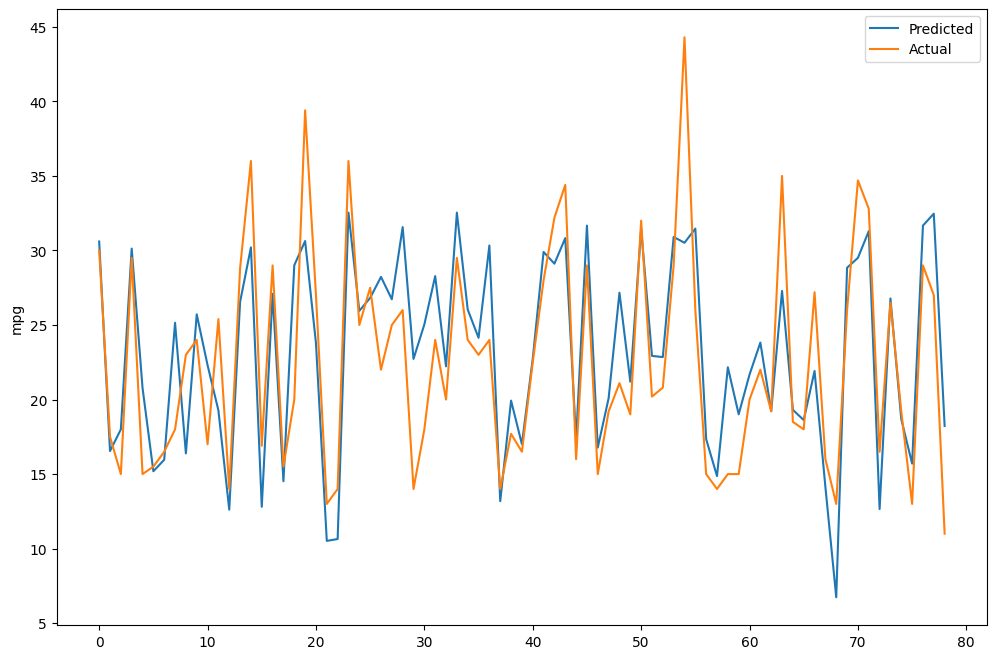

In [30]:
result_dict['mpg ~ single_linear'] = build_model(linear_reg,
                                                 'mpg',
                                                 ['weight'],
                                                 df,
                                                 show_plot_Y=True)

Training Score:  0.706247623087852
Test Score:  0.704649439544732


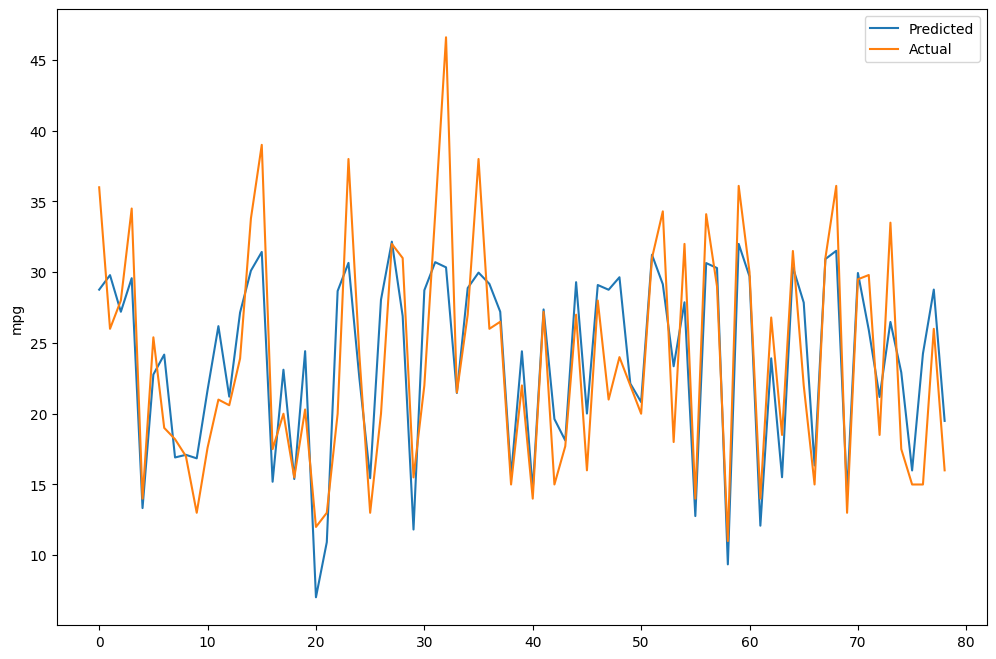

In [31]:
result_dict['mpg ~ kitchen_sink_linear'] = build_model(linear_reg,
                                                 'mpg',
                                                 ['cylinders','displacement', 'horsepower', 'weight', 'acceleration'],
                                                 df,
                                                 show_plot_Y=True)

Training Score:  0.7013582767168625
Test Score:  0.7213764998156451


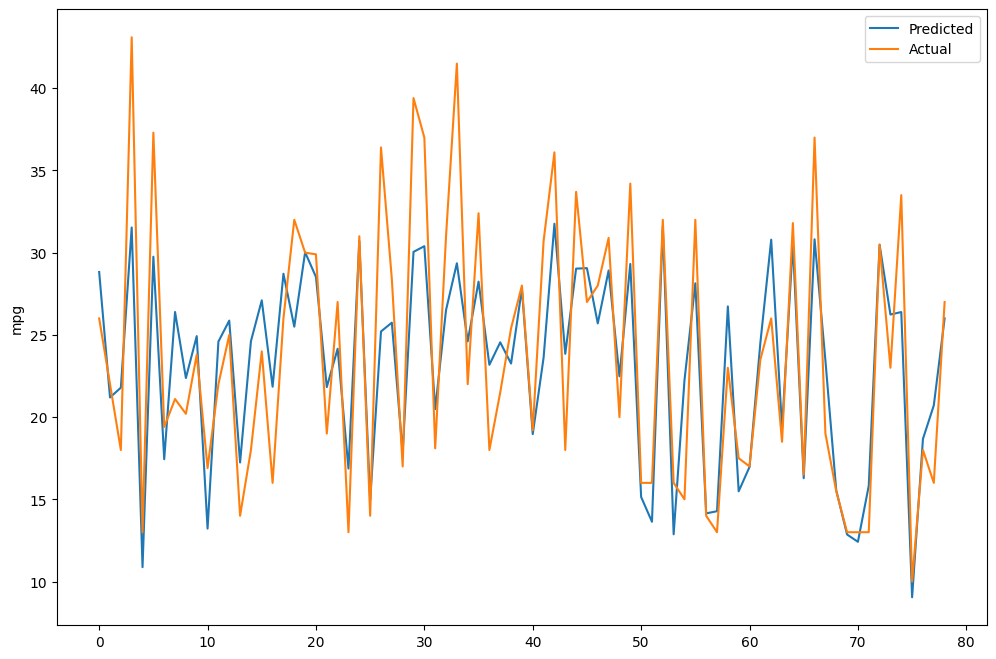

In [32]:
result_dict['mpg ~ parsimonious_linear'] = build_model(linear_reg,
                                                 'mpg',
                                                 ['horsepower', 'weight'],
                                                 df,
                                                 show_plot_Y=True)

In [33]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.699541275395748
Test score 0.6501140181182685

********************
Regression:  mpg ~ kitchen_sink_linear
Training score 0.706247623087852
Test score 0.704649439544732

********************
Regression:  mpg ~ parsimonious_linear
Training score 0.7013582767168625
Test score 0.7213764998156451

********************


## Lasso Regression

In [34]:
def lasso_reg(x_train, y_train, alpha=0.5):
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)

    return model

Training Score:  0.7080054577856574
Test Score:  0.6952748406743374


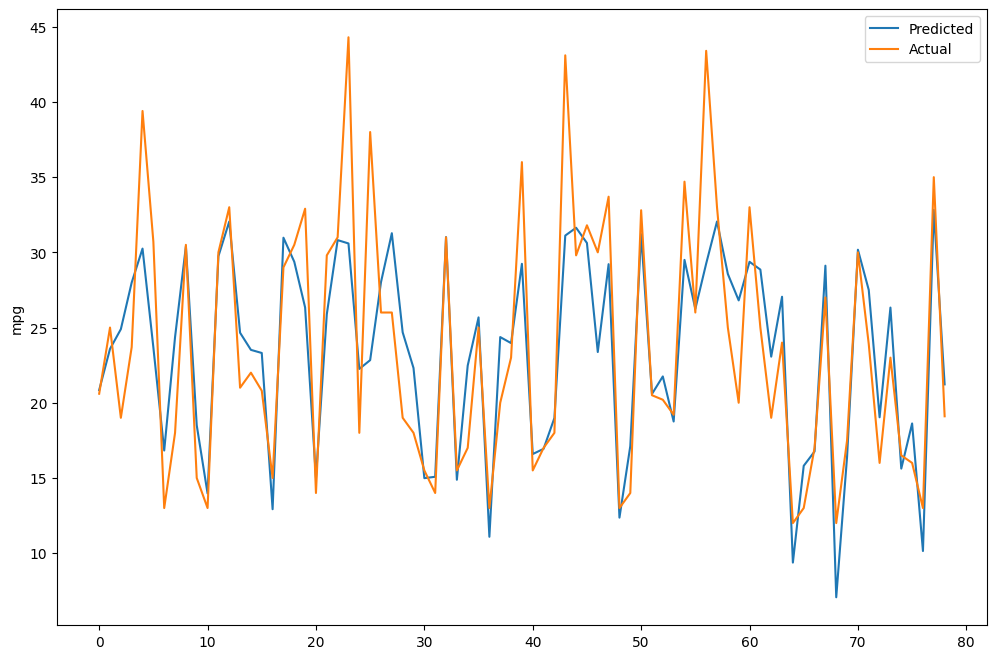

In [36]:
result_dict['mpg ~ lasso'] = build_model(lasso_reg,
                                         'mpg',
                                         ['cylinders','displacement', 'horsepower', 'weight', 'acceleration'],
                                         df,
                                         show_plot_Y=True)

In [37]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.699541275395748
Test score 0.6501140181182685

********************
Regression:  mpg ~ kitchen_sink_linear
Training score 0.706247623087852
Test score 0.704649439544732

********************
Regression:  mpg ~ parsimonious_linear
Training score 0.7013582767168625
Test score 0.7213764998156451

********************
Regression:  mpg ~ lasso
Training score 0.7080054577856574
Test score 0.6952748406743374

********************


## Ridge Regression

In [38]:
def ridge_reg(x_train, y_train, alpha=0.5):
    model = Ridge(alpha=alpha)
    model.fit(x_train, y_train)

    return model

Training Score:  0.7170031723911487
Test Score:  0.6605836692255505


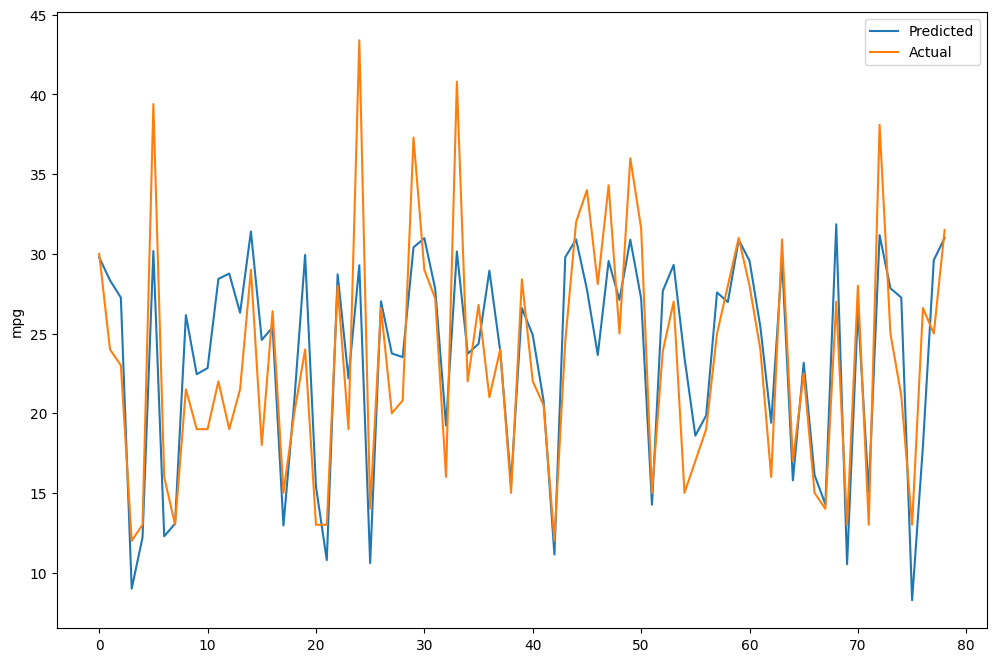

In [39]:
result_dict['mpg ~ ridge'] = build_model(ridge_reg,
                                         'mpg',
                                         ['cylinders','displacement', 'horsepower', 'weight', 'acceleration'],
                                         df,
                                         show_plot_Y=True)

In [40]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.699541275395748
Test score 0.6501140181182685

********************
Regression:  mpg ~ kitchen_sink_linear
Training score 0.706247623087852
Test score 0.704649439544732

********************
Regression:  mpg ~ parsimonious_linear
Training score 0.7013582767168625
Test score 0.7213764998156451

********************
Regression:  mpg ~ lasso
Training score 0.7080054577856574
Test score 0.6952748406743374

********************
Regression:  mpg ~ ridge
Training score 0.7170031723911487
Test score 0.6605836692255505

********************


## Elastic Net Regression

In [41]:
def elastic_net_reg(x_train, y_train, alpha=1, l1_ratio=0.5, max_iter=100000, warm_start=True, equivalent_to="Elastic Net"):

    print("Equivalent to: ", equivalent_to)
    
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=max_iter, warm_start=warm_start)
    model.fit(x_train, y_train)

    return model

In [43]:
from functools import partial

Equivalent to:  OLS
Training Score:  0.7224824103537653
Test Score:  0.6418699715757421


/home/gauravjain/projects/sci-kit/scilib/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/gauravjain/projects/sci-kit/scilib/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/gauravjain/projects/sci-kit/scilib/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.599e+03, tolerance: 1.873e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemente

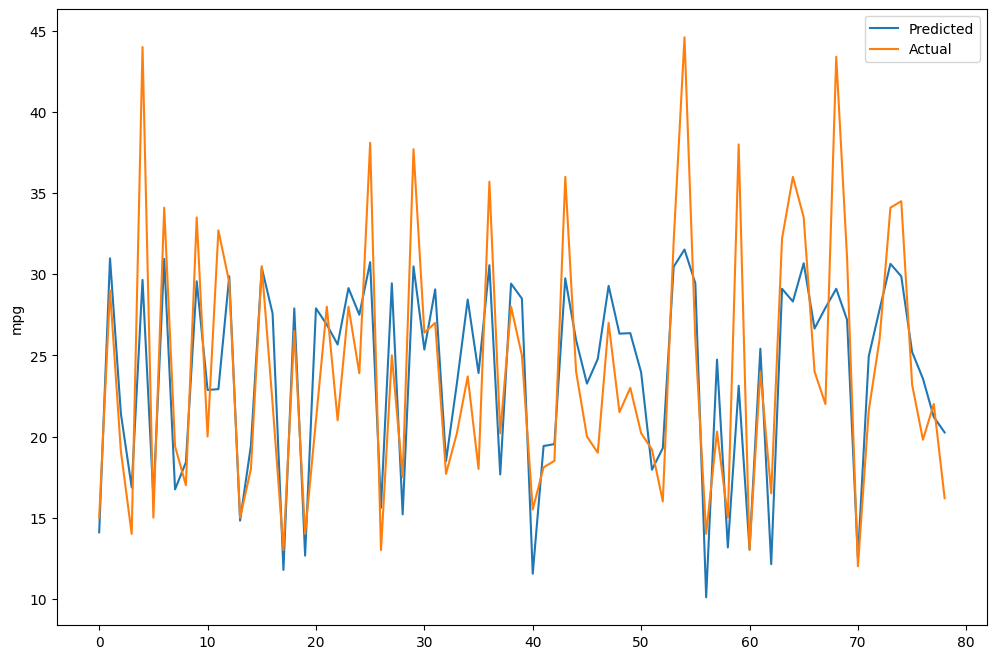

In [45]:
result_dict['mpg ~ elastic_net_reg'] = build_model(partial(elastic_net_reg,alpha=0,equivalent_to="OLS"),
                                         'mpg',
                                         ['cylinders','displacement', 'horsepower', 'weight', 'acceleration'],
                                         df,
                                         show_plot_Y=True)

Equivalent to:  Lasso
Training Score:  0.7030824940545064
Test Score:  0.7241999333204062


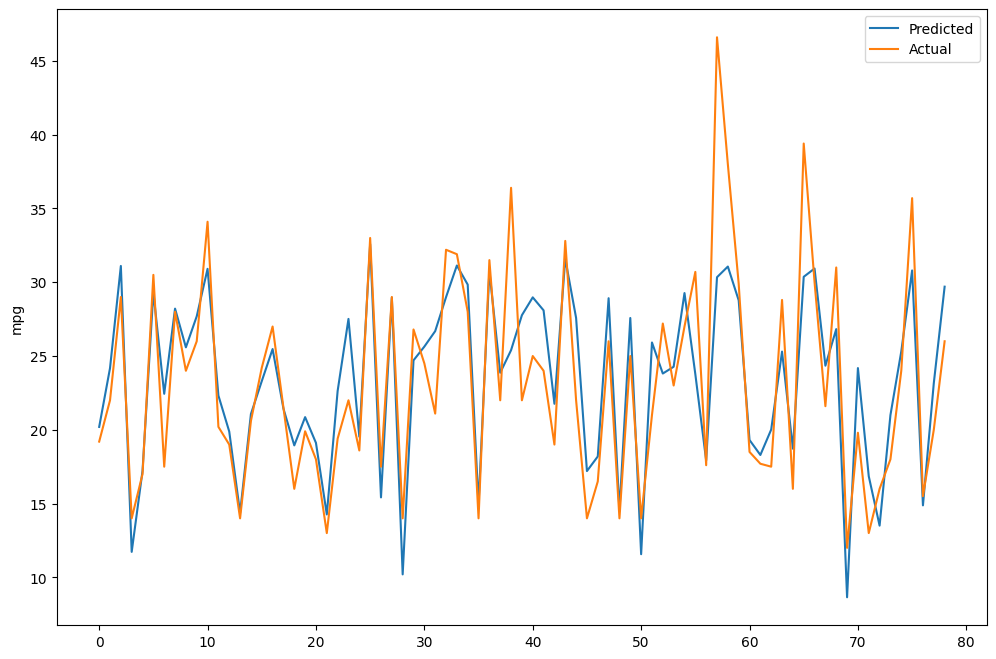

In [46]:
result_dict['mpg ~ elastic_net_lasso'] = build_model(partial(elastic_net_reg,alpha=1,l1_ratio=1,equivalent_to="Lasso"),
                                         'mpg',
                                         ['cylinders','displacement', 'horsepower', 'weight', 'acceleration'],
                                         df,
                                         show_plot_Y=True)

Equivalent to:  Ridge
Training Score:  0.706442525146918
Test Score:  0.7030132407593171


/home/gauravjain/projects/sci-kit/scilib/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.814e+03, tolerance: 1.916e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


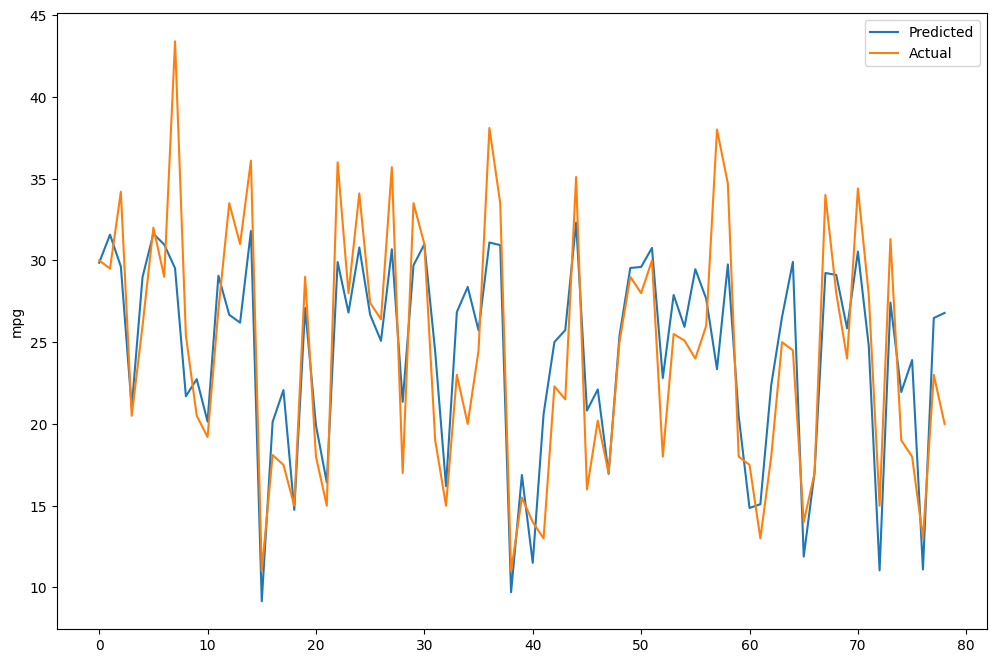

In [47]:
result_dict['mpg ~ elastic_net_ridge'] = build_model(partial(elastic_net_reg,alpha=1,l1_ratio=0,equivalent_to="Ridge"),
                                         'mpg',
                                         ['cylinders','displacement', 'horsepower', 'weight', 'acceleration'],
                                         df,
                                         show_plot_Y=True)

Equivalent to:  Elastic Net
Training Score:  0.7109368957917531
Test Score:  0.6772126689968678


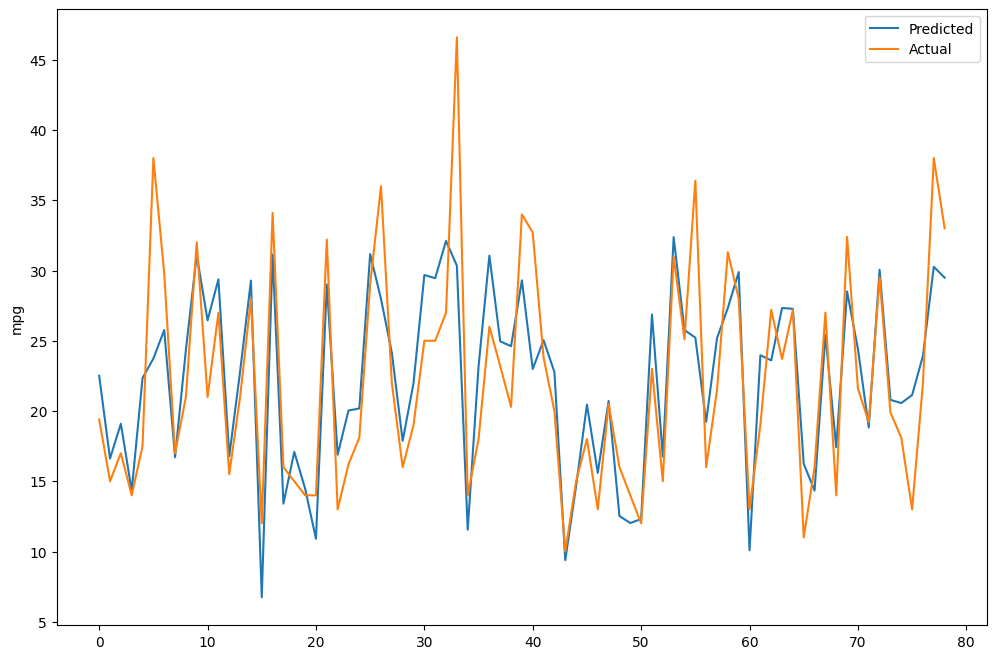

In [48]:
result_dict['mpg ~ elastic_net_final'] = build_model(partial(elastic_net_reg,alpha=1,l1_ratio=0.5),
                                         'mpg',
                                         ['cylinders','displacement', 'horsepower', 'weight', 'acceleration'],
                                         df,
                                         show_plot_Y=True)

In [49]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.699541275395748
Test score 0.6501140181182685

********************
Regression:  mpg ~ kitchen_sink_linear
Training score 0.706247623087852
Test score 0.704649439544732

********************
Regression:  mpg ~ parsimonious_linear
Training score 0.7013582767168625
Test score 0.7213764998156451

********************
Regression:  mpg ~ lasso
Training score 0.7080054577856574
Test score 0.6952748406743374

********************
Regression:  mpg ~ ridge
Training score 0.7170031723911487
Test score 0.6605836692255505

********************
Regression:  mpg ~ elastic_net_reg
Training score 0.7224824103537653
Test score 0.6418699715757421

********************
Regression:  mpg ~ elastic_net_lasso
Training score 0.7030824940545064
Test score 0.7241999333204062

********************
Regression:  mpg ~ elastic_net_ridge
Training score 0.706442525146918
Test score 0.7030132407593171

********************
Regression:  mpg ~ elastic_net_final
Training 

## Support Vector Regression (Linear)

In [50]:
def svr_reg(x_train, y_train, kernel='linear', epsilon=0.05, C=0.3):
    model = SVR(kernel=kernel, epsilon=epsilon, C=C)
    model.fit(x_train, y_train)

    return model

Training Score:  0.7037793479381136
Test Score:  0.6896903745054968


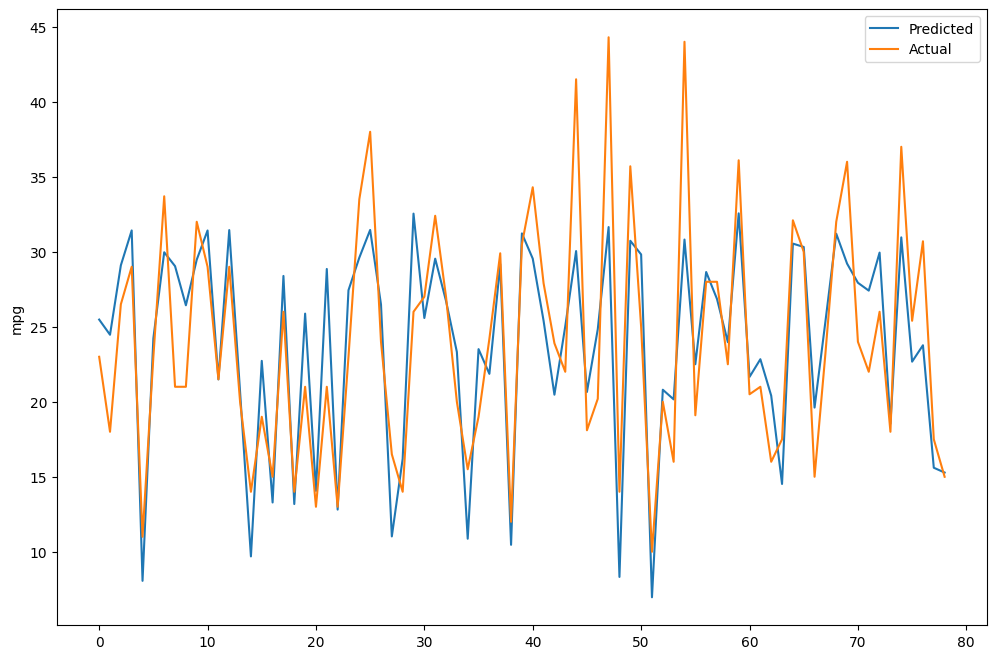

In [53]:
result_dict['mpg ~ svr'] = build_model(svr_reg,
                                         'mpg',
                                         ['cylinders','displacement', 'horsepower', 'weight', 'acceleration'],
                                         df,
                                         show_plot_Y=True)

In [54]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.699541275395748
Test score 0.6501140181182685

********************
Regression:  mpg ~ kitchen_sink_linear
Training score 0.706247623087852
Test score 0.704649439544732

********************
Regression:  mpg ~ parsimonious_linear
Training score 0.7013582767168625
Test score 0.7213764998156451

********************
Regression:  mpg ~ lasso
Training score 0.7080054577856574
Test score 0.6952748406743374

********************
Regression:  mpg ~ ridge
Training score 0.7170031723911487
Test score 0.6605836692255505

********************
Regression:  mpg ~ elastic_net_reg
Training score 0.7224824103537653
Test score 0.6418699715757421

********************
Regression:  mpg ~ elastic_net_lasso
Training score 0.7030824940545064
Test score 0.7241999333204062

********************
Regression:  mpg ~ elastic_net_ridge
Training score 0.706442525146918
Test score 0.7030132407593171

********************
Regression:  mpg ~ elastic_net_final
Training 

## K Nearest Neighbours

In [57]:
def knn_reg(x_train, y_train, n_neighbors=10):
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(x_train, y_train)

    return model

Training Score:  0.7513911918708733
Test Score:  0.7529540242172162


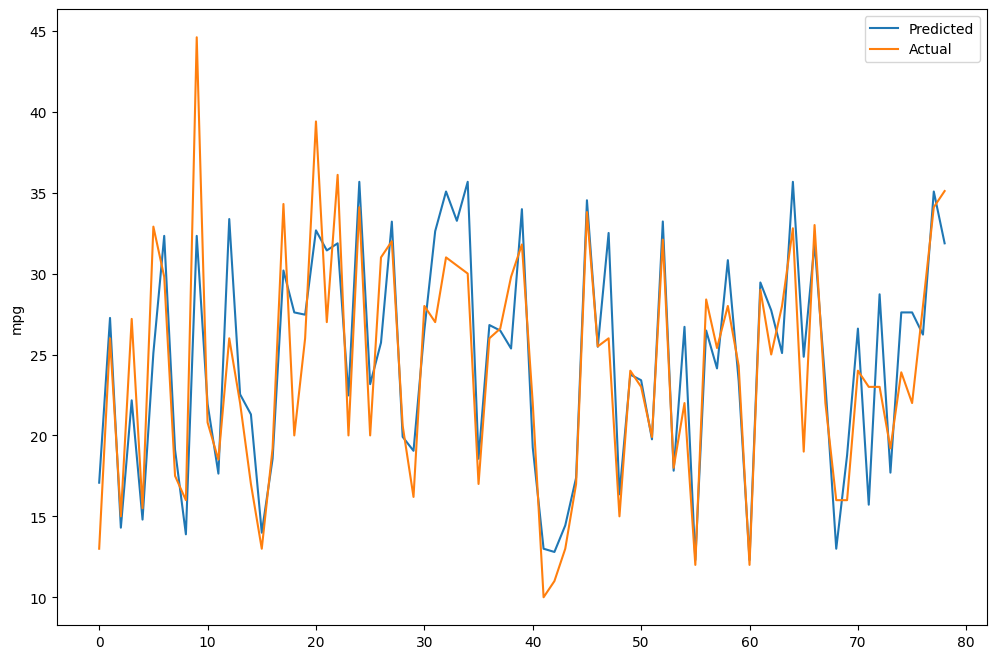

In [58]:
result_dict['mpg ~ knn_reg'] = build_model(knn_reg,
                                         'mpg',
                                         ['cylinders','displacement', 'horsepower', 'weight', 'acceleration'],
                                         df,
                                         show_plot_Y=True)

In [59]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.699541275395748
Test score 0.6501140181182685

********************
Regression:  mpg ~ kitchen_sink_linear
Training score 0.706247623087852
Test score 0.704649439544732

********************
Regression:  mpg ~ parsimonious_linear
Training score 0.7013582767168625
Test score 0.7213764998156451

********************
Regression:  mpg ~ lasso
Training score 0.7080054577856574
Test score 0.6952748406743374

********************
Regression:  mpg ~ ridge
Training score 0.7170031723911487
Test score 0.6605836692255505

********************
Regression:  mpg ~ elastic_net_reg
Training score 0.7224824103537653
Test score 0.6418699715757421

********************
Regression:  mpg ~ elastic_net_lasso
Training score 0.7030824940545064
Test score 0.7241999333204062

********************
Regression:  mpg ~ elastic_net_ridge
Training score 0.706442525146918
Test score 0.7030132407593171

********************
Regression:  mpg ~ elastic_net_final
Training 

## SGD Regression

In [61]:
def apply_standard_scaler(x):
    scaler = StandardScaler()
    scaler.fit(x)
    return scaler.transform(x)

In [65]:
def sgd_reg(x_train, y_train, max_iter=20000, tol=1e-3):
    model = SGDRegressor(max_iter=max_iter, tol=tol)
    model.fit(x_train, y_train)

    return model

Training Score:  0.6943859961403616
Test Score:  0.7705675277870478


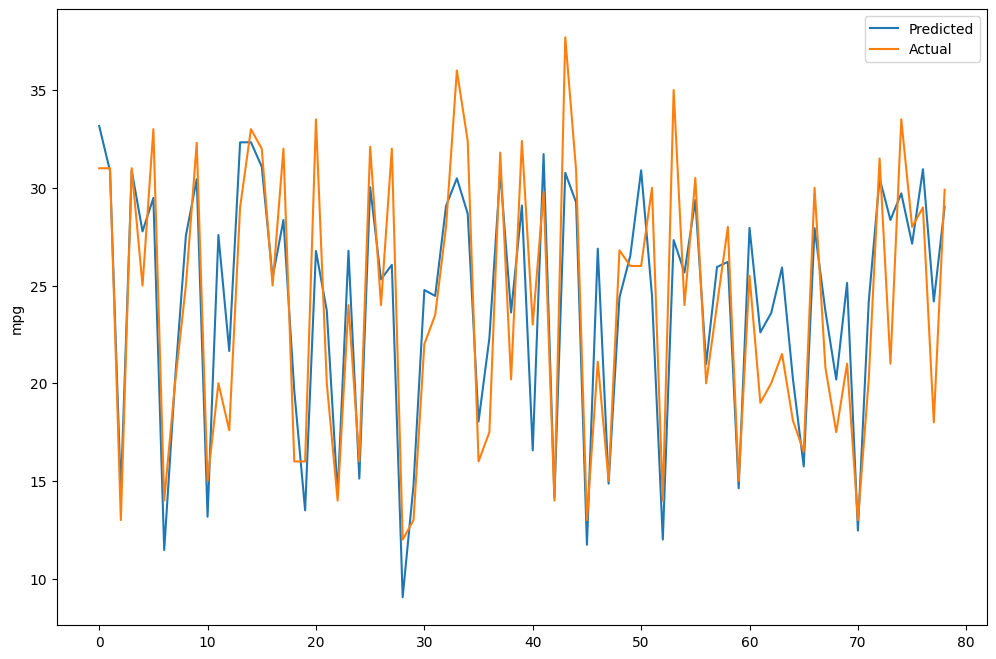

In [66]:
result_dict['mpg ~ sgd_reg'] = build_model(sgd_reg,
                                           'mpg',
                                           ['cylinders','displacement', 'horsepower', 'weight', 'acceleration'],
                                           df,
                                           show_plot_Y=True,
                                           preprocess_fn=apply_standard_scaler)

In [67]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.699541275395748
Test score 0.6501140181182685

********************
Regression:  mpg ~ kitchen_sink_linear
Training score 0.706247623087852
Test score 0.704649439544732

********************
Regression:  mpg ~ parsimonious_linear
Training score 0.7013582767168625
Test score 0.7213764998156451

********************
Regression:  mpg ~ lasso
Training score 0.7080054577856574
Test score 0.6952748406743374

********************
Regression:  mpg ~ ridge
Training score 0.7170031723911487
Test score 0.6605836692255505

********************
Regression:  mpg ~ elastic_net_reg
Training score 0.7224824103537653
Test score 0.6418699715757421

********************
Regression:  mpg ~ elastic_net_lasso
Training score 0.7030824940545064
Test score 0.7241999333204062

********************
Regression:  mpg ~ elastic_net_ridge
Training score 0.706442525146918
Test score 0.7030132407593171

********************
Regression:  mpg ~ elastic_net_final
Training 

## Decision Tree Regression

In [68]:
def dtree_reg(x_train, y_train, max_depth=2):
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(x_train, y_train)

    return model

Training Score:  0.7137909968413099
Test Score:  0.7697011819232393


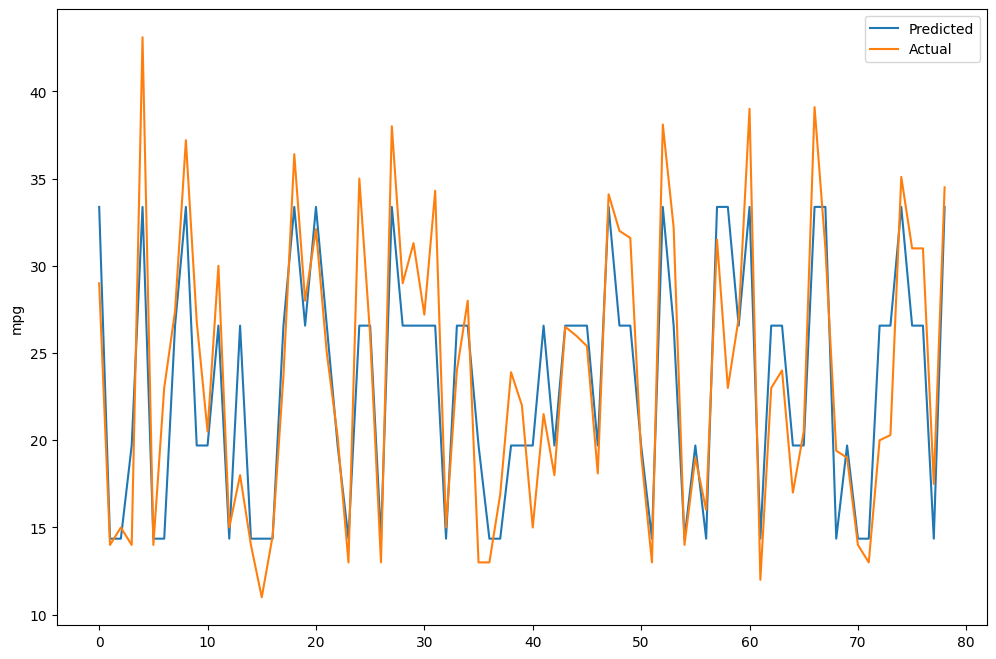

In [69]:
result_dict['mpg ~ dtree_reg'] = build_model(dtree_reg,
                                           'mpg',
                                           ['cylinders','displacement', 'horsepower', 'weight', 'acceleration'],
                                           df,
                                           show_plot_Y=True)

In [70]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.699541275395748
Test score 0.6501140181182685

********************
Regression:  mpg ~ kitchen_sink_linear
Training score 0.706247623087852
Test score 0.704649439544732

********************
Regression:  mpg ~ parsimonious_linear
Training score 0.7013582767168625
Test score 0.7213764998156451

********************
Regression:  mpg ~ lasso
Training score 0.7080054577856574
Test score 0.6952748406743374

********************
Regression:  mpg ~ ridge
Training score 0.7170031723911487
Test score 0.6605836692255505

********************
Regression:  mpg ~ elastic_net_reg
Training score 0.7224824103537653
Test score 0.6418699715757421

********************
Regression:  mpg ~ elastic_net_lasso
Training score 0.7030824940545064
Test score 0.7241999333204062

********************
Regression:  mpg ~ elastic_net_ridge
Training score 0.706442525146918
Test score 0.7030132407593171

********************
Regression:  mpg ~ elastic_net_final
Training 

## Least Angle Regression (LARS)

In [71]:
def lars_reg(x_train, y_train, n_nonzero_coefs=4):
    model = Lars(n_nonzero_coefs=n_nonzero_coefs)
    model.fit(x_train, y_train)

    return model

Training Score:  0.6974962773935629
Test Score:  0.7373259956011553


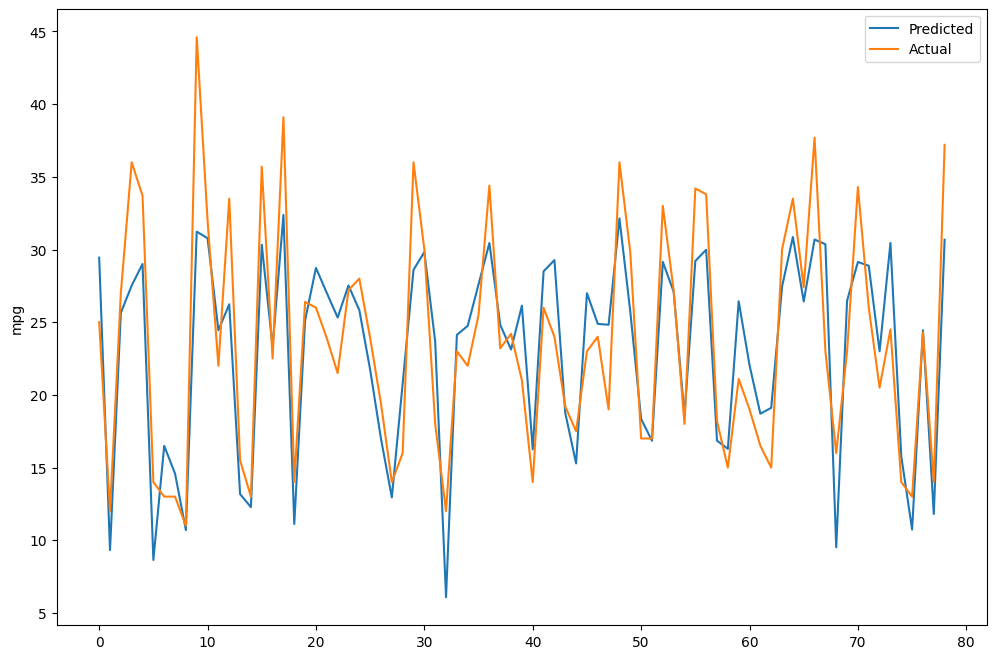

In [72]:
result_dict['mpg ~ lars_reg'] = build_model(lars_reg,
                                           'mpg',
                                           ['cylinders','displacement', 'horsepower', 'weight', 'acceleration'],
                                           df,
                                           show_plot_Y=True)

In [74]:
compare_results()

Regression:  mpg ~ single_linear
Training score 0.699541275395748
Test score 0.6501140181182685

********************
Regression:  mpg ~ kitchen_sink_linear
Training score 0.706247623087852
Test score 0.704649439544732

********************
Regression:  mpg ~ parsimonious_linear
Training score 0.7013582767168625
Test score 0.7213764998156451

********************
Regression:  mpg ~ lasso
Training score 0.7080054577856574
Test score 0.6952748406743374

********************
Regression:  mpg ~ ridge
Training score 0.7170031723911487
Test score 0.6605836692255505

********************
Regression:  mpg ~ elastic_net_reg
Training score 0.7224824103537653
Test score 0.6418699715757421

********************
Regression:  mpg ~ elastic_net_lasso
Training score 0.7030824940545064
Test score 0.7241999333204062

********************
Regression:  mpg ~ elastic_net_ridge
Training score 0.706442525146918
Test score 0.7030132407593171

********************
Regression:  mpg ~ elastic_net_final
Training 

## Hyper Parameter Training

In [75]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV

In [76]:
ds = pd.read_csv('datasets/auto-mpg-processed.csv')

In [77]:
X = ds.drop(['mpg', 'age'], axis=1)
Y = ds['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### Lasso

In [78]:
parameters = {'alpha': [0.2, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0]}

grid_search = GridSearchCV(Lasso(), parameters, cv=3, return_train_score=True)
grid_search.fit(x_train, y_train)

grid_search.best_params_

{'alpha': 0.7}

In [79]:
for i in range(7):
    print('Parameters: ', grid_search.cv_results_['params'][i])
    print('Mean Test Score: ', grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ', grid_search.cv_results_['rank_test_score'][i])

Parameters:  {'alpha': 0.2}
Mean Test Score:  0.6754179548708444
Rank:  7
Parameters:  {'alpha': 0.4}
Mean Test Score:  0.6766854344376204
Rank:  6
Parameters:  {'alpha': 0.6}
Mean Test Score:  0.6775365797202569
Rank:  5
Parameters:  {'alpha': 0.7}
Mean Test Score:  0.67776817361701
Rank:  1
Parameters:  {'alpha': 0.8}
Mean Test Score:  0.6777465788078678
Rank:  2
Parameters:  {'alpha': 0.9}
Mean Test Score:  0.6777222366818267
Rank:  3
Parameters:  {'alpha': 1.0}
Mean Test Score:  0.6776972816952821
Rank:  4


In [80]:
lasso_model = Lasso(alpha=grid_search.best_params_['alpha']).fit(x_train, y_train)

In [82]:
y_pred = lasso_model.predict(x_test)

In [84]:
print('Training Score: ', lasso_model.score(x_train, y_train))
print('Test Score: ', r2_score(y_test, y_pred))

Training Score:  0.6897186991849467
Test Score:  0.7535635229205491


In [87]:
# K Neighbours

parameters = {'n_neighbors': [10, 12, 14, 18, 20, 25, 30, 35, 50]}

grid_search = GridSearchCV(KNeighborsRegressor(), parameters, cv=3, return_train_score=True)
grid_search.fit(x_train, y_train)

grid_search.best_params_

{'n_neighbors': 30}

In [88]:
kn_model = KNeighborsRegressor(n_neighbors=grid_search.best_params_['n_neighbors']).fit(x_train, y_train)

In [89]:
y_pred = kn_model.predict(x_test)
print('Training Score: ', kn_model.score(x_train, y_train))
print('Test Score: ', r2_score(y_test, y_pred))

Training Score:  0.7020711390989431
Test Score:  0.7873459871523358


In [90]:
# Decision Tree

parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]}

grid_search = GridSearchCV(DecisionTreeRegressor(), parameters, cv=3, return_train_score=True)
grid_search.fit(x_train, y_train)

grid_search.best_params_

{'max_depth': 4}

In [91]:
dt_model = DecisionTreeRegressor(max_depth=grid_search.best_params_['max_depth']).fit(x_train, y_train)

In [92]:
y_pred = dt_model.predict(x_test)
print('Training Score: ', dt_model.score(x_train, y_train))
print('Test Score: ', r2_score(y_test, y_pred))

Training Score:  0.8170080756479351
Test Score:  0.6797427868666426


In [93]:
# SVR

parameters = {'epsilon': [0.05, 0.1, 0.2, 0.3], 'C': [0.2, 0.3]}

grid_search = GridSearchCV(SVR(kernel='linear'), parameters, cv=3, return_train_score=True)
grid_search.fit(x_train, y_train)

grid_search.best_params_

{'C': 0.3, 'epsilon': 0.2}

In [94]:
svr_model = SVR(kernel='linear', epsilon=grid_search.best_params_['epsilon'], C=grid_search.best_params_['C']).fit(x_train, y_train)

In [95]:
y_pred = svr_model.predict(x_test)
print('Training Score: ', svr_model.score(x_train, y_train))
print('Test Score: ', r2_score(y_test, y_pred))

Training Score:  0.6763149661995662
Test Score:  0.750743265433353
